# PREPARATION

## import librairies

In [1]:
# Indispensables
import pandas as pd
import numpy as np
#import geopandas as gpd
#import math

# general
import os
from os import listdir
#from os.path import isfile, join
#from os import walk
import sys
import io
import glob
import platform
#
print(os.name, "\n", platform.system(), "\n", platform.release())
#
import argparse
#from datetime import datetime
#import h5py
#import importlib

# VISU
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
#from matplotlib.colors import LogNorm

# IMAGES
#from IPython.display import Image, IFrame
#from PIL import Image
#import rasterio
import imageio

import colorsys

print('Panda version: %s' % pd.__version__)
print('Numpy version: %s' % np.__version__)
#print('Geo Panda version: %s' % gpd.__version__)

%matplotlib inline

nt 
 Windows 
 8.1
Panda version: 0.25.1
Numpy version: 1.16.5


In [317]:
from __future__ import print_function

# Machine Lerning
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation     #LSTM
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from keras import backend as K
from keras.callbacks import History

from keras.optimizers import SGD
from keras.regularizers import l2

print('TensorFlow: %s' % tf.__version__)
print('Keras: %s' % keras.__version__)

TensorFlow: 2.0.0
Keras: 2.3.1


## Déclaration des directories et variables

In [5]:
BASE_DIR = os.getcwd()

separe = "/"
# Laptop
if platform.system() == 'Darwin' and platform.release() == '18.7.0':
    DATA_DIR  = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/"
    DATA_DIR2 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA2/"
    DATA_DIR3 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/"
# sur IMAC
else:   #if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    DATA_DIR  = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/"
    DATA_DIR2 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA2/"
    DATA_DIR3 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/"
## Eurométropole
if platform.system() == 'Windows':
    DATA_DIR  = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\"
    DATA_DIR2 = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA2\\"
    DATA_DIR3 = "C:\\Users\\STG3841\\Mes Documents (local)\\travail\\"
    separe = "\\"   
    
DALLE_NUM = DATA_DIR + "DallesNumPoints5m" + separe
DALLE_ECA = DATA_DIR + "DallesEcartZ5m" + separe
DALLE_POS = DATA_DIR + "DallesPosition5m" + separe
print("Working directory:",BASE_DIR)
print("Data ROOT directory:",DATA_DIR)

sys.path.append(DATA_DIR)
sys.path.append(os.path.join(DATA_DIR,'DallesNumPoints5m\\'))
sys.path

Working directory: C:\Users\STG3841\Mes Documents (local)\travail
Data ROOT directory: S:\Commun\SIG3D\2020\PROJETS_2020\20039_MachineLearning\DATA\


['C:\\Users\\STG3841\\Mes Documents (local)\\travail',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\python37.zip',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\DLLs',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3',
 '',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\STG3841\\.ipython',
 'S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\',
 'S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\DallesNumPoints5m\\']

## création des listes d'images

In [6]:
#liste1 = [f for f in listdir(DALLE_NUM) if isfile(join(DALLE_NUM, f))]
liste_1 = [f for f in glob.glob(DALLE_NUM + separe + "*.tif", recursive=True)]#   #only first N for test
liste_2 = [f for f in glob.glob(DALLE_ECA + separe + "*.tif", recursive=True)]#
liste_3 = [f for f in glob.glob(DALLE_POS + separe + "*.tif", recursive=True)]#
print(len(listdir(DALLE_NUM)), len(liste_1), len(liste_2), len(liste_3))

liste_NUM = os.listdir(DALLE_NUM)
liste_ECA = os.listdir(DALLE_ECA)
liste_POS = os.listdir(DALLE_POS)
print(len(liste_NUM), len(liste_ECA), len(liste_POS))

58776 29384 29384 29384
58776 58775 58768


# DONNEES

## TEST:  Lecture des images

## lecture/creation fichier/dataframe lampes des lampadaires présents dans la dalle 1x1 km

In [7]:
# Intialisation des variables de la dalle
fich_lamp  = DATA_DIR  + "LampadairePresence_0_1_5m.asc"
fich_lamp2 = DATA_DIR2 + "listepositif.xlsx"

header = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=0, nrows=5, names=["noms","valeurs"])
n_row =  header['valeurs'][0]
n_col =  header['valeurs'][1]
xlow = header['valeurs'][2]
ylow = header['valeurs'][3]
cell_size = header['valeurs'][4]
print("Bord inférieur gauche:", xlow, ylow, n_row, n_col, cell_size)

lampadaires = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=6)
print(lampadaires.sum().head(5))
print(lampadaires.nunique().agg(['mean','count','sum']))
##################################
# reconstruit le tableau dans le bon schéma usuel
# calcule la transposee
lampadaires = lampadaires.T
# inversion des colonnes (nombre pair de colonnes, mais pas nécessaire)
lampadaires = lampadaires[lampadaires.columns[::-1]]
##################################
lampes0 = pd.DataFrame(np.reshape(lampadaires.to_numpy(), n_row*n_col))

lampes2 = pd.read_excel(fich_lamp2, header=0, skiprows=0)
print(lampadaires.shape, lampes0.shape, lampes2.shape)
#print(lampadaires.describe())
print(lampadaires.sum().sum())
lampes2.head(5)

Bord inférieur gauche: 2042500 7272000 200 200 5
0    3.0
1    4.0
2    6.0
3    2.0
4    1.0
dtype: float64
mean       1.79
count    200.00
sum      358.00
dtype: float64
(200, 200) (40000, 1) (355, 5)
357.0


,_column,_row,_overlaps,posX,posY
0,0,80,1,2042502,7272402
1,0,92,1,2042502,7272462
2,0,102,1,2042502,7272512
3,0,106,1,2042502,7272532
4,0,169,1,2042502,7272847


## rempli le dataframe lampes0 et lampes1

In [8]:
lampes0['NumI'] = lampes0.index
lampes0['NumY'] = lampes0['NumI'].mod(other=n_col)
lampes0['NumX'] = ((lampes0['NumI'] - n_row + 1) / n_row).apply(np.ceil)
#lampes = lampes.drop(['Num'], axis=1)
lampes0.rename(columns={0: 'present'}, inplace=True)
lampes0 = lampes0.astype({'present': 'int8'}, copy=False)
lampes0 = lampes0.astype({'NumY': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumI': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumX': 'int32'}, copy=False)
print(lampes0.dtypes)
#print(lampes.describe(include='all'))
lampes0['X'] = xlow + lampes0['NumX'] * cell_size
lampes0['Y'] = ylow + lampes0['NumY'] * cell_size
lampes0['nom_NUM'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_NumPoints5m.tif"
lampes0['nom_ECA'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) + "_EcartZ5m.tif"
lampes0['nom_POS'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_Position5m.tif"
# extraction des lampadaires
lampes1 = lampes0[lampes0['present'] > 0]
print("Dalle:", lampes0.shape, "Nbre lampadaires:", lampes1.shape)
lampes0.head()

present     int8
NumI       int32
NumY       int32
NumX       int32
dtype: object
Dalle: (40000, 9) Nbre lampadaires: (357, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
0,0,0,0,0,2042500,7272000,2042500_7272000_NumPoints5m.tif,2042500_7272000_EcartZ5m.tif,2042500_7272000_Position5m.tif
1,0,1,1,0,2042500,7272005,2042500_7272005_NumPoints5m.tif,2042500_7272005_EcartZ5m.tif,2042500_7272005_Position5m.tif
2,0,2,2,0,2042500,7272010,2042500_7272010_NumPoints5m.tif,2042500_7272010_EcartZ5m.tif,2042500_7272010_Position5m.tif
3,0,3,3,0,2042500,7272015,2042500_7272015_NumPoints5m.tif,2042500_7272015_EcartZ5m.tif,2042500_7272015_Position5m.tif
4,0,4,4,0,2042500,7272020,2042500_7272020_NumPoints5m.tif,2042500_7272020_EcartZ5m.tif,2042500_7272020_Position5m.tif


In [9]:
lampes1.tail(8)

,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
39336,1,39336,136,196,2043480,7272680,2043480_7272680_NumPoints5m.tif,2043480_7272680_EcartZ5m.tif,2043480_7272680_Position5m.tif
39384,1,39384,184,196,2043480,7272920,2043480_7272920_NumPoints5m.tif,2043480_7272920_EcartZ5m.tif,2043480_7272920_Position5m.tif
39520,1,39520,120,197,2043485,7272600,2043485_7272600_NumPoints5m.tif,2043485_7272600_EcartZ5m.tif,2043485_7272600_Position5m.tif
39570,1,39570,170,197,2043485,7272850,2043485_7272850_NumPoints5m.tif,2043485_7272850_EcartZ5m.tif,2043485_7272850_Position5m.tif
39577,1,39577,177,197,2043485,7272885,2043485_7272885_NumPoints5m.tif,2043485_7272885_EcartZ5m.tif,2043485_7272885_Position5m.tif
39685,1,39685,85,198,2043490,7272425,2043490_7272425_NumPoints5m.tif,2043490_7272425_EcartZ5m.tif,2043490_7272425_Position5m.tif
39756,1,39756,156,198,2043490,7272780,2043490_7272780_NumPoints5m.tif,2043490_7272780_EcartZ5m.tif,2043490_7272780_Position5m.tif
39763,1,39763,163,198,2043490,7272815,2043490_7272815_NumPoints5m.tif,2043490_7272815_EcartZ5m.tif,2043490_7272815_Position5m.tif


In [10]:
print(lampes1.shape, lampes0.shape)
lampes1.head(240).tail(20)


(357, 9) (40000, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
27731,1,27731,131,138,2043190,7272655,2043190_7272655_NumPoints5m.tif,2043190_7272655_EcartZ5m.tif,2043190_7272655_Position5m.tif
27747,1,27747,147,138,2043190,7272735,2043190_7272735_NumPoints5m.tif,2043190_7272735_EcartZ5m.tif,2043190_7272735_Position5m.tif
28103,1,28103,103,140,2043200,7272515,2043200_7272515_NumPoints5m.tif,2043200_7272515_EcartZ5m.tif,2043200_7272515_Position5m.tif
28125,1,28125,125,140,2043200,7272625,2043200_7272625_NumPoints5m.tif,2043200_7272625_EcartZ5m.tif,2043200_7272625_Position5m.tif
28131,1,28131,131,140,2043200,7272655,2043200_7272655_NumPoints5m.tif,2043200_7272655_EcartZ5m.tif,2043200_7272655_Position5m.tif
28193,1,28193,193,140,2043200,7272965,2043200_7272965_NumPoints5m.tif,2043200_7272965_EcartZ5m.tif,2043200_7272965_Position5m.tif
28256,1,28256,56,141,2043205,7272280,2043205_7272280_NumPoints5m.tif,2043205_7272280_EcartZ5m.tif,2043205_7272280_Position5m.tif
28393,1,28393,193,141,2043205,7272965,2043205_7272965_NumPoints5m.tif,2043205_7272965_EcartZ5m.tif,2043205_7272965_Position5m.tif
28463,1,28463,63,142,2043210,7272315,2043210_7272315_NumPoints5m.tif,2043210_7272315_EcartZ5m.tif,2043210_7272315_Position5m.tif
28464,1,28464,64,142,2043210,7272320,2043210_7272320_NumPoints5m.tif,2043210_7272320_EcartZ5m.tif,2043210_7272320_Position5m.tif


## Extraction de(s) image(s) dans un dataframe unique (à partir de imageio)

In [569]:
from keras.preprocessing.image import load_img, save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

off = 2000
NN = 0
NM = NN + off

dal1 = ['nom_NUM', 'nom_ECA', 'nom_POS']
dal2 = [DALLE_NUM, DALLE_ECA, DALLE_POS]
listes = [liste_1, liste_2, liste_3]
data = ['data1', 'data12', 'data3']
#### Pour eviter les fichiers manquants
# Compare les deux SETS (impossible avec des listes)
for m in range(1,4):
    print("M:", m)
    set_A = set(dal2[m-1] + lampes1[dal1[m-1]])
    set_B = set(listes[m-1])
    set_C1 = set_A & set_B
    set_C2 = set_B - set_A
    liste_C = list(set_C2)
    liste_extraite = list(liste_C[NN:NM]) + list(set_C1)
    #liste_extraite = list(set(list(liste_1[NN:NM]) + list(set_C1)))
    print(len(set_B), len(set_A), len(set_C1), len(set_C2), len(liste_1), len(liste_extraite))

    test = False
    if test:
    #  Ne fonctionne pas np.array(load_img(fname)) for fname in list_lamp0
        data[m-1] = np.array([np.array(imageio.imread(fname)) for fname in liste_extraite])
        data[m-1].shape
        fichier = DATA_DIR3 + "data_LAS_" + str(dal1[m-1]) + "_" + str(off) + ".npy"
        np.save(fichier, data[m-1])

    liste_y1 = [ 0 for x in range(len(liste_C[NN:NM]))]
    liste_y2 = [ 1 for x in range(len(list(set_C1)))]
    liste_y = liste_y1 + liste_y2
    print(len(liste_y1), len(liste_y2),len(liste_y))


M: 1
29384 357 352 29032 29384 2352
2000 352 2352
M: 2
29384 357 352 29032 29384 2352
2000 352 2352
M: 3
29384 357 352 29032 29384 2352
2000 352 2352


### Lecture de TOUS les fichiers
5s pour 100 fichiers

~45mn ???    pour 40000 fichiers

### création de la table de 200-300 colonnes

In [ ]:
#  limitation à 1000-5000 valeurs
test = False
off = 200
if test:
    off = 2000
    #off = len(lampes0)

NN = 0
NM = NN + off

n_row2 =  10   #TODO mettre le produit des dimension de la matrice image
n_col2 =  10
N2 = n_row2*n_col2  # N=100

#################################################
#################################################
###   TODO ... regarder l'unicité des 2 listes
#################################################
#################################################

### assemble 2 listes (lampadaires totale + NM * valeurs au hazard ... fichiers unique)
#list_lamp0 = list(set(lampes0['nom_NUM'][NN:NM] + list(DALLE_NUM + list_lamp1)))
list_lamp0 = list(DALLE_NUM + lampes0['nom_NUM'][NN:NM]) + list(DALLE_NUM + lampes1['nom_NUM'])
list_lamp0b = list(lampes0['present'][NN:NM]) + list(lampes1['present'])
#lamp0 = np.array(list_lamp0b)
list_lamp1 = list(DALLE_NUM + lampes1['nom_NUM'])
list_lamp2 = list(DALLE_ECA + lampes1['nom_ECA'])
print(list_lamp0[:2])
print(list_lamp0b[:2])
#print(list_lamp1[:2])
#print(list_lamp2[:2])
print(len(list_lamp0), len(list_lamp0b), len(list_lamp1), len(list_lamp2))

i=0
for n,fich1 in enumerate(list_lamp0):
    if n%500 == 1:
        print(n, list_lamp0b[n])
    fich2 = fich1.replace("NumPoints5m", "EcartZ5m")
    #fich3 = fich1.replace("NumPoints5m", "Position5m")
    #fiche3 = DALLE_POS+fich3
    
# fichiers dalles manquantes ???? ... pourquoi ?????
    if os.path.exists(fich1) and os.path.exists(fich2):    # Manque des fichiers sur les 40000
        i += 1
        if i%1000 == 1:
            print(n, i, list_lamp0b[n])
        data1 = np.reshape(imageio.imread(fich1), N2) #.flatten()
        data1T = np.expand_dims(data1, axis=0)
        data2 = np.reshape(imageio.imread(fich2), N2)
        data2T = np.expand_dims(data2, axis=0)
        #data3 = np.reshape(imageio.imread(fiche3), N2)
        #data3T = np.expand_dims(data3, axis=0)
        #print(i, data1T.shape, data2T.shape, data3T.shape)
        df_int1 = pd.DataFrame(data1T, index=[i])  #, index=indices)
        df_int2 = pd.DataFrame(data2T, index=[i])  
        #df_int3 = pd.DataFrame(data3T, index=[i])
        # MERGE 
        #df_inta = df_int1.merge(df_int2, left_index=True, right_index=True, suffixes=('_num', '_h'))
        #df_int = df_inta.merge(df_int3, left_index=True, right_index=True)
        df_int = df_int1.merge(df_int2, left_index=True, right_index=True, suffixes=('_num', '_h'))
        df_int['label'] = list_lamp0b[n]    #
        if i == 1:
            #print(dataT)
            df3 = df_int
        else:
            df3 = pd.concat([df3, df_int])
    else:
        pass     #print(fiche1, fich2)
if i > 0:
    print(n+1, i, n+1-i, df3.shape, df3.shape[0]/i)

for n in range(0,N2):
    df3 = df3.astype({str(n)+'_num': 'int8'}, copy=False)
#print(df3.dtypes)
df3

#  TODO rajouter une colonne de présence ( comparer avec SORTIE :  0 ou 1)
#####################################################
#  remplir une colonne de zéro
#  puis boucler sur les N=357 valeurs pour indiquer la présence d'un lampadaire
#####################################################
#  puis faire 100 sorties 0-1 pour  les 100 positions

In [ ]:
df3_total = df3.copy()

test = df3_total.describe()[:3].T
test['val'] = (test['count'] * test['mean'])
test

In [ ]:
test = False
# Sauvegarde du fichier total 

if test:
    fileSAVE = DATA_DIR3 + "donnees_LAS_1k_1k.csv"
    #fileSAVE = DATA_DIR3 + "donnees_IMAC_LAS_1k_1k.csv"
    df3.to_csv(fileSAVE, index=False)

print(df3_total.shape)

# KERAS - TENSORFLOW

## Lecture du fichier de données

In [311]:
print(tf.keras.datasets)
if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    df4 = pd.read_csv(DATA_DIR3 + "donnees_IMAC_LAS_1k_1k.csv")
else:
    df4 = pd.read_csv(DATA_DIR3 + "donnees_LAS_1k_1k.csv")
print(df4.shape)
df4.head()

<module 'tensorflow_core.keras.datasets' from 'C:\\Users\\STG3841\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\__init__.py'>
(29736, 201)


,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
0,0,0,0,0,0,0,0,6,3,1,...,0.55,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0
1,0,0,0,0,4,3,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.3,0.0,0
2,1,2,1,1,0,1,0,0,0,0,...,0.00,0.00,0.00,0.67,0.17,0.58,0.0,0.0,0.0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.17,0.35,0.77,0.00,0.00,0.00,0.0,0.0,0.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0


### Changement de la classe en categorial

In [380]:
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical

# Charge et split les données
X = df4.iloc[:,:-1]
y = df4.iloc[:,-1]
y_binary = to_categorical(y)

### Séparation Train - Test

In [425]:
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#    X, y, test_size=0.2, random_state=42, stratify=y)

print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape, y_binary.shape, y.shape)

(23788, 200) (23788, 2) (5948, 200) (5948, 2) (29736, 2) (29736,)


## Création d'un Modèle Réseau de Neurone "SIMPLE"

In [414]:
print("train", train_data.shape, test_data.shape)
print(train_labels.shape)

train (23788, 200) (5948, 200)
(23788, 2)


In [426]:
#Nomb_Input = 200
fil_M = 32    # 512-256-128-64-32 ?
kernel = 3
epochs = 10
batch_size = 32
n_dens = 50  # 100 ou 200?

num_class = 2   # ou ce

# redimensionnement nécesaire pour la convolution
train_data = np.expand_dims(train_data, axis=2)
#   ou  ?  train_data.reshape(train_data.shape[0], train_data.shape[1], 1)  et input_shape=(train_data.shape[1], 1)
test_data = np.expand_dims(test_data, axis=2)

model0 = Sequential()
model0.add(Conv1D(fil_M, kernel, activation='relu', input_shape=(train_data.shape[1],train_data.shape[2])))
#model0.add(Conv1D(fil_M, kernel, activation='relu'))
#model0.add(Dropout(0.5))
model0.add(MaxPooling1D(pool_size=(2)))
# model0.add(BatchNormalization())
model0.add(Flatten())        
model0.add(Dense(n_dens, activation='relu'))
model0.add(Dense(num_class, activation='sigmoid'))

model0.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

model0.summary()

history0 = model0.fit(train_data, train_labels, validation_split=0.33, verbose=2, epochs=epochs, batch_size=batch_size)


Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_43 (Conv1D)           (None, 198, 32)           128       
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 99, 32)            0         
_________________________________________________________________
flatten_74 (Flatten)         (None, 3168)              0         
_________________________________________________________________
dense_162 (Dense)            (None, 50)                158450    
_________________________________________________________________
dense_163 (Dense)            (None, 2)                 102       
Total params: 158,680
Trainable params: 158,680
Non-trainable params: 0
_________________________________________________________________
Train on 15937 samples, validate on 7851 samples
Epoch 1/10
 - 7s - loss: 0.1266 - accuracy: 0.9752 - val_loss: 0

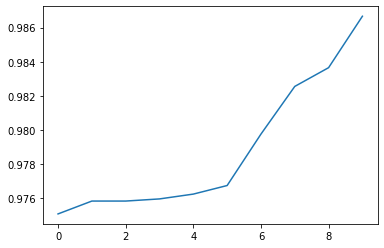

In [427]:
history0 = history0b
#history0.history
# plot metrics
test = False
if test:
    _ = plt.plot(history0.history['msle'])
    _ = plt.plot(history0.history['mean_squared_error'])
    _ = plt.plot(history0.history['binary_accuracy'])
    _ = plt.plot(history0.history['categorical_accuracy'])
_ = plt.plot(history0.history['accuracy'])
_ = plt.show()

In [428]:
model0.summary()

# model.save_weights('file.h5')

# avec le model construit + les poids
# model.load_weights('file.h5')


Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_43 (Conv1D)           (None, 198, 32)           128       
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 99, 32)            0         
_________________________________________________________________
flatten_74 (Flatten)         (None, 3168)              0         
_________________________________________________________________
dense_162 (Dense)            (None, 50)                158450    
_________________________________________________________________
dense_163 (Dense)            (None, 2)                 102       
Total params: 158,680
Trainable params: 158,680
Non-trainable params: 0
_________________________________________________________________


### Figures

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


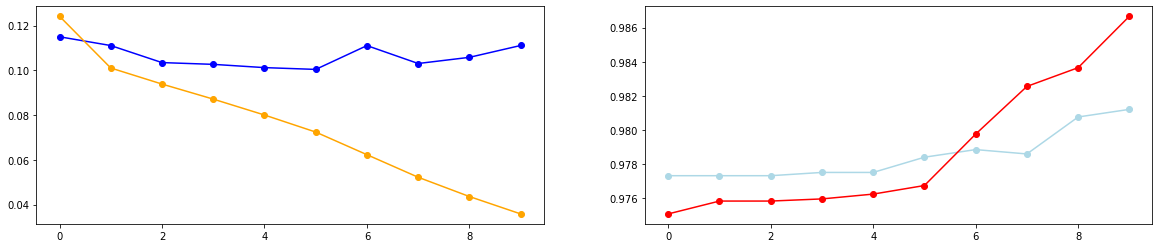

In [429]:
print(history0.history.keys())
coul = ["blue", "lightblue", "orange", "red"]

fig = plt.figure(figsize=(20,4))
_ = plt.subplot(1,2,1)
for i in range(0,4,2):
    _ = plt.plot(list(history0.history.values())[i],'k-o', color=coul[i])
_ = plt.subplot(1,2,2)
for j in range(1,4,2):
    _ = plt.plot(list(history0.history.values())[j],'k-o', color=coul[j])

In [430]:
print(history0.history.keys())
print(history0.history['val_accuracy'][-1])
print(history0.history['accuracy'][-1])
print(history0.history['val_loss'][-1])
print(history0.history['loss'][-1])


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
0.9812125563621521
0.98666626
0.11107659498861892
0.0358407639080684


Test loss: 0.10286678752198655
Test accuracy: 0.9783120155334473
[0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


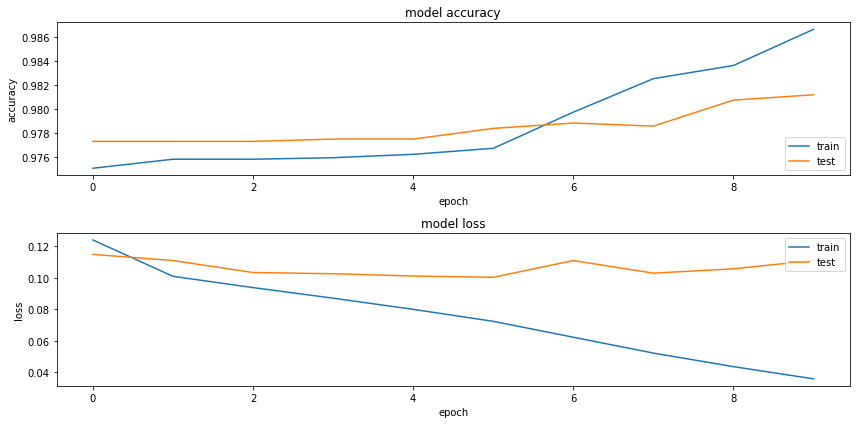

In [431]:
# RESULTATS
score = model0.evaluate(test_data, test_labels, verbose=0, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predictions
classes = model0.predict(test_data, batch_size=batch_size)
predictions = model0.predict(test_data[:10])
print(np.argmax(predictions, axis=1))
print(test_labels[:10,1])

# PLOTS
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history0.history['accuracy'])
_ = plt.plot(history0.history['val_accuracy'])
_ = plt.title('model accuracy')
_ = plt.xlabel('epoch')
_ = plt.ylabel('accuracy')
_ = plt.legend(['train','test'], loc='lower right')

_ = plt.subplot(2,1,2)
_ = plt.plot(history0.history['loss'])
_ = plt.plot(history0.history['val_loss'])
_ = plt.title('model loss')
_ = plt.xlabel('epoch')
_ = plt.ylabel('loss')
_ = plt.legend(['train','test'], loc='upper right')

_ = plt.tight_layout()
_ = fig

### Matrice de Confusion

Echantillon Test: 5948
Echantillon Train: 23788
Prédit       0.0       1.0
Reel                      
0.0     0.996556  0.141844
1.0     0.018770  0.226950
Predit   0.0  1.0   All
Reel                   
0.0     5787   20  5807
1.0      109   32   141
All     5896   52  5948


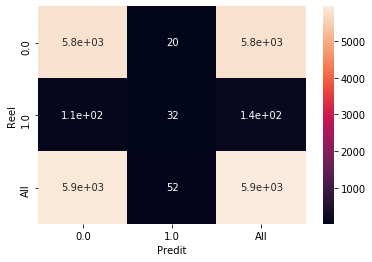

Predit       0.0       1.0  All
Reel                           
0.0     0.498278  0.001722  0.5
1.0     0.386525  0.113475  0.5
All     0.495629  0.004371  0.5


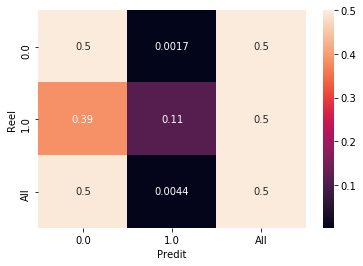

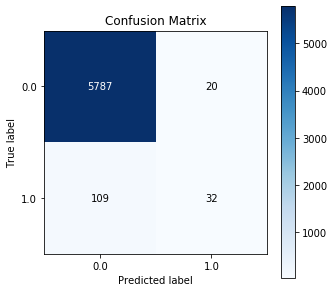

In [432]:
from sklearn.metrics import confusion_matrix
#       pip install scikit-plot
import scikitplot as skplt

# transforme les matrice en listes d'entiers binaires (0 ou 1)
Y11 = pd.DataFrame(model0.predict(test_data)[:,1:])[0].round(0).tolist()
Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()
print("Echantillon Test:", len(Y11))
confusion_matrix(Y11, Y10)

Y01 = pd.DataFrame(model0.predict(train_data)[:,1:])[0].round(0).tolist()
Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
print("Echantillon Train:", len(Y01))
confusion_matrix(Y01, Y00)

y_reel = pd.Series(Y10, name='Reel')
y_pred = pd.Series(Y11, name='Prédit')

df_confusion = pd.crosstab(y_reel, y_pred)

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_conf_norm)

df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel'], colnames=['Predit'], margins=True)
print(df_confusion)
_ = sns.heatmap(df_confusion, annot=True)
plt.show()

df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)
print(df_conf_norm)
_ = sns.heatmap(df_conf_norm, annot=True)
plt.show()

######### NOT WORKING ???
#from pandas_ml import ConfusionMatrix
#confusion_matrix = ConfusionMatrix(y_reel, y_pred)
#confusion_matrix.plot()
#plt.show()
#confusion_matrix.plot(normalized=True)
#plt.show()

#binary_confusion_matrix = ConfusionMatrix(y_true, y_pred)
#print("Binary confusion matrix:\n%s" % binary_confusion_matrix)
#print(binary_confusion_matrix.TP) # TN, FP, FN, ...
#binary_confusion_matrix.plot(normalized=False)
#binary_confusion_matrix.plot(normalized=True, backend='seaborn')
#plt.show()
#confusion_matrix.print_stats()
#confusion_matrix.stats()
##########


skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))

(5948, 4) (23788, 4)
(5807, 4) (141, 4) (23225, 4) (563, 4)

 ERREURS: 0_true     0.0
0_pred     0.0
0_pred2    0.0
diff       0.0
dtype: float64 0_true      0.000000
0_pred     14.764087
0_pred2    20.000000
diff      -20.000000
dtype: float64 0_true     0.0
0_pred     0.0
0_pred2    0.0
diff       0.0
dtype: float64 0_true      0.000000
0_pred     56.550104
0_pred2     0.000000
diff        0.000000
dtype: float64

 LOSS 0.021687962340282446


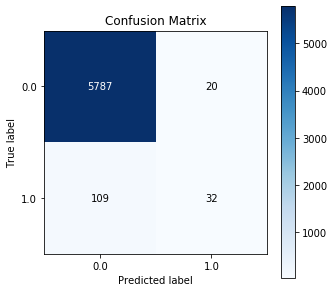

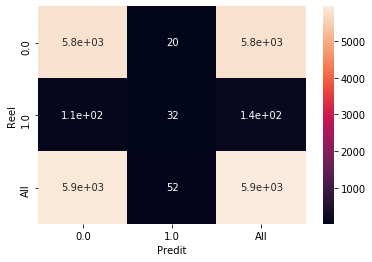

In [433]:
import scikitplot as skplt

def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

def tab_result(df_a, df_b):
    # Extrait les matrices binaires en 1 seule colonne
    y_pred = pd.DataFrame(model0.predict(df_b)[:,1:])
    y_true = pd.DataFrame(df_a[:,1:])
    # création de la table
    dy = y_true.merge(y_pred, left_index=True, right_index=True, suffixes=('_true', '_pred'))
    dy['0_true'] = dy['0_true'].astype(int)
    dy['0_pred2'] = dy['0_pred'].round(0)   #arrondi à l'entier le + proche
    dy['diff'] = dy['0_true'] - dy['0_pred2']
    return dy

def lampe_results(df1, df2):
    df_10 = df1[df1['0_true'] == 0]
    df_11 = dy1[dy1['0_true'] == 1]
    df_20 = df2[df2['0_true'] == 0]
    df_21 = dy2[dy2['0_true'] == 1]
    return (df_10, df_11, df_20, df_21)

dy1 = tab_result(test_labels, test_data)
dy2 = tab_result(train_labels, train_data)
dy1.head(2)
dy2.head(2)
df_test_1, df_test_0, df_train_1, df_train_0 = lampe_results(dy1, dy2)

print(dy1.shape, dy2.shape)
print(df_test_1.shape, df_test_0.shape, df_train_1.shape, df_train_0.shape)
#print(df_test_0.describe())
true_pos1 = df_test_1[(df_test_1['0_pred2'] == 1) & (df_test_1['0_true'] == 1)].sum()
fals_pos1 = df_test_1[(df_test_1['0_pred2'] == 1) & (df_test_1['0_true'] == 0)].sum()
fals_neg1 = df_test_1[(df_test_1['0_pred2'] == 0) & (df_test_1['0_true'] == 1)].sum()
true_neg1 = df_test_1[(df_test_1['0_pred2'] == 0) & (df_test_1['0_true'] == 0)].sum()
print("\n ERREURS:", true_pos1, fals_pos1, fals_neg1, true_neg1)
#####################################
# sensitivity-recall : TPR = TP/P = TP / (TP + FN)
# specificity-select : TNR = TN/N = TN / (TN + FP)
# balance : = (TPR + TNR) / 2
# precision          : TP / (TP + FP)

# accuracy    : ACC = (TP + TN) / total
# FI score    :  2 * TP / (2 TP + FP + FN) == 2 / (1/precision + 1/recall)
#####################################


# calcul pour LOSS du Mean Squared Error
print("\n LOSS", mse_loss(y_reel, y_pred))

_ = skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))
plt.show()

confusion_matrix(dy1['0_true'], dy1['0_pred2'])
sns.heatmap(df_confusion, annot=True)
plt.show()

# KERAS :  images bi-dimensionelles

In [651]:
import torch
from torch.utils.data import Dataset

class MyDataset(Dataset):
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __getitem__(self, index):
        sample = {
            'feature': torch.tensor([self.x[index]], dtype=torch.float32), 
            'label': torch.tensor([self.y[index]], dtype=torch.long)}
        return sample
    
    def __len__(self):
        return len(self.x)

In [655]:
dataset = MyDataset(data , data_y)
sample = len(dataset)
print('length: ', sample)
pour = 75
X1 = int(pour/100 * sample)
X2 = sample - X1
for i in range(len(dataset)):
    #pp.pprint(dataset[i])
    pass

from torch.utils.data import random_split
train, test = random_split(dataset, [X1, X2])

x_train = np.empty((2, len(train)))
y_train = np.empty((len(train)))
for i in range(len(train)):
    #pp.pprint(train[i])
    x_train[:,i] = train[i]['feature'].numpy().reshape(2)
    y_train[i] = train[i]['label'][0].numpy()

print('test length: ', len(test))    
x_test = np.empty((2, len(test)))
y_test = np.empty((len(test)))
for i in range(len(test)):
    #pp.pprint(test[i])
    x_test[:,i] = test[i]['feature'].numpy().reshape(2)
    y_test[i] = test[i]['label'][0].numpy()
    
plt.scatter(x_train[0,:], x_train[1,:], c=y_train, cmap=cm.bwr, alpha=0.4)
plt.scatter(x_test[0,:], x_test[1,:], c=y_test, cmap=cm.PiYG, alpha=0.4)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-3,10)
plt.ylim(-3,10)

length:  2352


TypeError: Scalar tensor has no `len()`

## Lecture du fichier de données

In [646]:
#off = 20000

fichier1  = DATA_DIR3 + "data_LAS_nom_NUM_" + str(off) + ".npy"
data1     = np.load(fichier1)
fichier2  = DATA_DIR3 + "data_LAS_nom_ECA_" + str(off) + ".npy"
data2     = np.load(fichier2)
#print(type(data1), type(data2))
print(data1.shape, data2.shape)

# concatenation de NUM et POS
data14 = tf.expand_dims(data1, 3)
data24 = tf.expand_dims(data2, 3)
print(data14.shape, data24.shape)
data = tf.concat([data14, data24], 3)
print(data.shape)

#data = data1
taille = data.shape[0]
print(taille)

fichierY = DATA_DIR3 + "data_LAS_nom_POS_" + str(off) + ".npy"
data_y = np.load(fichierY).reshape(taille,100)

print("Fichiers utilisés:\n", fichier1, " et\n", fichier2, "\n", data.shape)
print("Classification utiliseé:\n", fichierY, "\n", data_y.shape)

Nomb_Input = data.shape

(2352, 10, 10) (2352, 10, 10)
(2352, 10, 10, 1) (2352, 10, 10, 1)
(2352, 10, 10, 2)
2352
Fichiers utilisés:
 C:\Users\STG3841\Mes Documents (local)\travail\data_LAS_nom_NUM_2000.npy  et
 C:\Users\STG3841\Mes Documents (local)\travail\data_LAS_nom_ECA_2000.npy 
 (2352, 10, 10, 2)
Classification utiliseé:
 C:\Users\STG3841\Mes Documents (local)\travail\data_LAS_nom_POS_2000.npy 
 (2352, 100)


### tests

### Séparation Train - Test 

In [647]:
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical

# Charge et split les données
###############   TODO      ###############
####### Ne fonctionne pas avec les 2 cubes 
X = data
# X = data1
print("Dimensions X:", X.shape)
##############################################
###  Passage mode binaire à une liste de 100
y = liste_y
y_binary = to_categorical(y)
print("Dimensions Y:", y_binary.shape, len(y))
#
# y = data_y
# print(y.shape)
#############################

# tfds   tensorflow dataset splitting
# test_split, valid_split, train_split = tfds.Split.TRAIN.subsplit([10, 15, 75])
# PYTORCH   torchtext.data.Dataset
# split(split_ratio=0.7, stratified=False, strata_field='label', random_state=None


train_data, test_data, train_labels, test_labels = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#    X, y, test_size=0.2, random_state=42, stratify=y)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print("Train et Test:", train_data.shape, len(train_labels), test_data.shape, len(test_labels))

#train_data = np.expand_dims(train_data, axis=3)
#test_data = np.expand_dims(test_data, axis=3)

#### Ce n'est plus nécessaire si X est un Tenseur 4D
#train_data = train_data.reshape(train_data.shape[0], 10, 10, 1)
#test_data  = test_data.reshape(test_data.shape[0], 10, 10, 1)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print(train_data.shape, len(train_labels), test_data.shape, len(test_labels))


Dimensions X: (2352, 10, 10, 2)
Dimensions Y: (2352, 2) 2352


TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got array([1206, 1262,  392, ...,  157,  556,  889], dtype=int64)

## Modèles CNN 2D

In [603]:
# 2) Train CONVNET on the MNIST dataset

input_shape = (10, 10, 1)     #input_shape = (10, 10, 2)

epochs = 50
batch_size = 64
ratio = 10 * 401 / 70
poids_class = {0: 1., 1: ratio}

model2 = Sequential([
    Conv2D(6, (5,5), padding="same", strides=(1,1), input_shape=input_shape),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(16, (5,5), padding="same", strides=(1,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(120, activation='relu'),
    #Dropout(0.1),
    Dense(100, activation='relu'),
    #Dropout(0.1),
    Dense(2, activation='softmax')
])

#model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])
model2.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


history2 = model2.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, class_weight=poids_class,
#class_weight='balanced',
          verbose=1, validation_data=(test_data, test_labels))

score = model2.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 1881 samples, validate on 471 samples
Epoch 1/50
1881/1881 [==============================] - 1s 563us/step - loss: 3.2188 - accuracy: 0.1802 - val_loss: 1.6792 - val_accuracy: 0.1635
Epoch 2/50
1881/1881 [==============================] - 0s 168us/step - loss: 2.6773 - accuracy: 0.1770 - val_loss: 2.1222 - val_accuracy: 0.1486
Epoch 3/50
1881/1881 [==============================] - 0s 157us/step - loss: 2.5179 - accuracy: 0.1834 - val_loss: 1.4203 - val_accuracy: 0.2144
Epoch 4/50
1881/1881 [==============================] - 0s 158us/step - loss: 2.4689 - accuracy: 0.2047 - val_loss: 1.7260 - val_accuracy: 0.1932
Epoch 5/50
1881/1881 [==============================] - 0s 159us/step - loss: 2.3730 - accuracy: 0.2142 - val_loss: 2.3670 - val_accuracy: 0.1826
Epoch 6/50
1881/1881 [==============================] - 0s 165us/step - loss: 2.3406 - accuracy: 0.2238 - val_loss: 1.4172 - val_accuracy: 0.2229
Epoch 7/50
1881/1881 [==============================] - 0s 159us/step - loss:

### Sommaire

In [604]:
model2.summary()

# model.save_weights('file.h5')
# avec le model construit + les poids
# model.load_weights('file.h5')

Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_215 (Conv2D)          (None, 10, 10, 6)         156       
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 5, 5, 6)           0         
_________________________________________________________________
conv2d_216 (Conv2D)          (None, 5, 5, 16)          2416      
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_97 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_227 (Dense)            (None, 120)               7800      
_________________________________________________________________
dense_228 (Dense)            (None, 100)            

### Figures

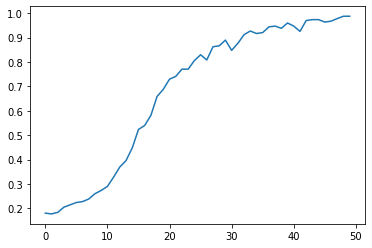

In [605]:
#history0.history
# plot metrics
#_ = plt.plot(history2.history['binary_accuracy'])
_ = plt.plot(history2.history['accuracy'])
_ = plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


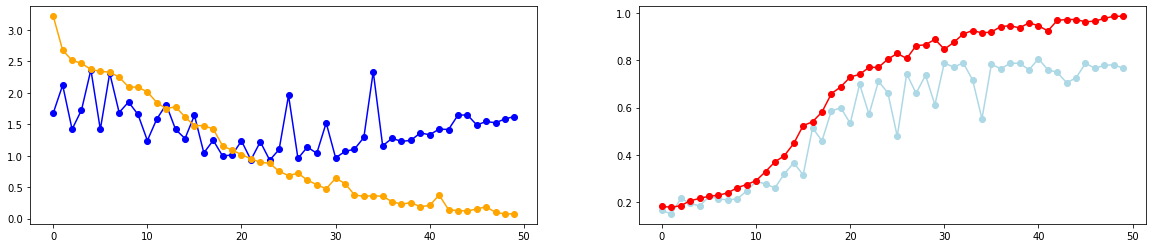

In [606]:
print(history2.history.keys())
coul = ["blue", "lightblue", "orange", "red"]

fig = plt.figure(figsize=(20,4))
_ = plt.subplot(1,2,1)
for i in range(0,4,2):
    _ = plt.plot(list(history2.history.values())[i],'k-o', color=coul[i])
_ = plt.subplot(1,2,2)
for j in range(1,4,2):
    _ = plt.plot(list(history2.history.values())[j],'k-o', color=coul[j])

Test loss: 1.622772153269207
Test accuracy: 0.7664543390274048
[0 0 0 1 1 0 0 0 0 0]
[1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]


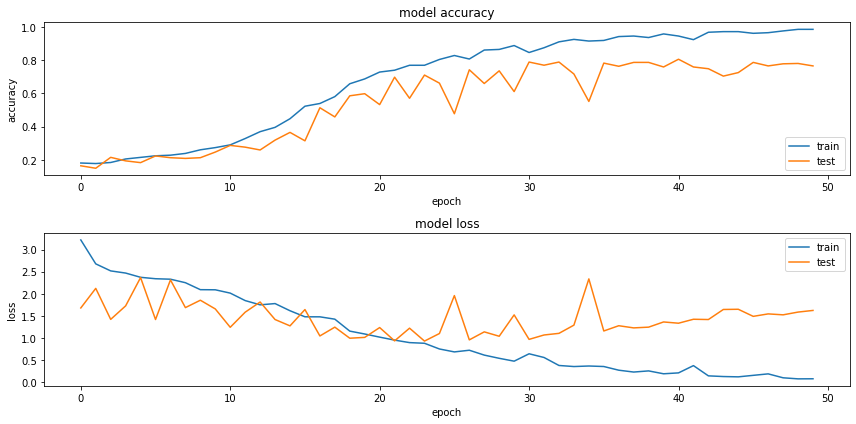

In [607]:
# RESULTATS
score = model2.evaluate(test_data, test_labels, verbose=0, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predictions
classes = model2.predict(test_data, batch_size=batch_size)
predictions = model2.predict(test_data[:10])
#predictions = model2.predict_classes(test_data[:10])
print(np.argmax(predictions, axis=1))
print(test_labels[:10,0])

# PLOTS
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history2.history['accuracy'])
_ = plt.plot(history2.history['val_accuracy'])
_ = plt.title('model accuracy')
_ = plt.xlabel('epoch')
_ = plt.ylabel('accuracy')
_ = plt.legend(['train','test'], loc='lower right')

_ = plt.subplot(2,1,2)
_ = plt.plot(history2.history['loss'])
_ = plt.plot(history2.history['val_loss'])
_ = plt.title('model loss')
_ = plt.xlabel('epoch')
_ = plt.ylabel('loss')
_ = plt.legend(['train','test'], loc='upper right')

_ = plt.tight_layout()
_ = fig

### Matrice de confusion

Echantillon Train: 1881
Echantillon Test: 471

 Predit  0.0  1.0  All
Reel                 
0.0     340   61  401
1.0      49   21   70
All     389   82  471


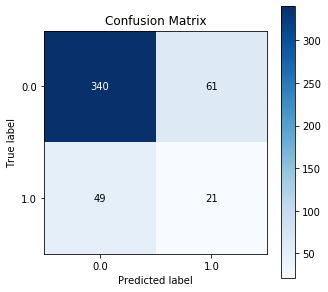


 Predit       0.0       1.0      All
Reel                               
0.0     0.423940  0.435714  0.42569
1.0     0.061097  0.150000  0.07431
All     0.485037  0.585714  0.50000

 Predit       0.0       1.0  All
Reel                           
0.0     0.423940  0.076060  0.5
1.0     0.350000  0.150000  0.5
All     0.412951  0.087049  0.5


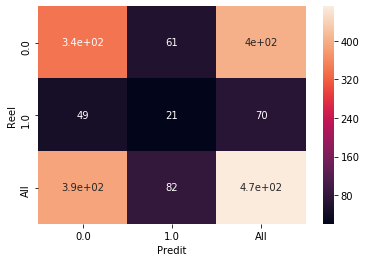

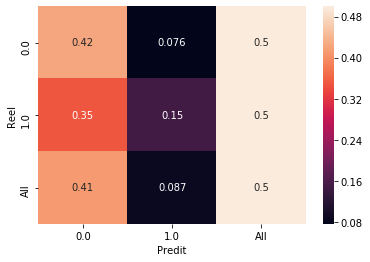

In [608]:
from sklearn.metrics import confusion_matrix
#       pip install scikit-plot
import scikitplot as skplt

# transforme les matrice en listes d'entiers binaires (0 ou 1)
Y01 = pd.DataFrame(model2.predict(train_data)[:,1:])[0].round(0).tolist()
Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
print("Echantillon Train:", len(Y01))
#confusion_matrix(Y01, Y00)

Y11 = pd.DataFrame(model2.predict(test_data)[:,1:])[0].round(0).tolist()
Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()
print("Echantillon Test:", len(Y11))
#confusion_matrix(Y11, Y10)

y_reel = pd.Series(Y10, name='Reel')
y_pred = pd.Series(Y11, name='Prédit')
df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel'], colnames=['Predit'], margins=True)
print("\n", df_confusion)
#
skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))
plt.show()
#
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print("\n", df_conf_norm)
df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)
print("\n", df_conf_norm)

_ = sns.heatmap(df_confusion, annot=True)
plt.show()
_ = sns.heatmap(df_conf_norm, annot=True)
plt.show()

# KERAS hyperparametres

In [301]:
from sklearn.model_selection import GridSearchCV

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

def create_model(neurons=1, optimizer='adam', dropout_rate=0.0, learn_rate=0.01, momentum=0, 
                 init_mode='uniform', activation='relu', dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(neurons, kernel_initializer=init_mode, input_dim=8, activation=activation)'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 42
numpy.random.seed(seed)
# load dataset

dataset = 
# split into input (X) and output (Y) variables
X = dataset
Y = dataset

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, dropout_rate=0.2, verbose=0)

              
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
weight_constraint = [i for i in range (1, 6, 1)]
dropout_rate = [i/10 for i in range (0, 10, 1)]
neurons = [1, 5, 10, 15, 20, 25, 30]

param_grid = dict(neurons=neurons, learn_rate=learn_rate, momentum=momentum, optimizer=optimizer, 
                init_mode=init_mode, batch_size=batch_size, epochs=epochs, activation=activation,
                dropout_rate=dropout_rate, weight_constraint=weight_constraint)
#  score = ???
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)   # n_jobs=-1  parallisation
grid_result = grid.fit(X, Y)

# summarize results ==>  best_score et best_params_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

SyntaxError: invalid syntax (<ipython-input-301-ded477e1019e>, line 19)